# Let's make IOU

""" Intersection Usion      
Args:      
    box1 : 2D array [x,y,w,h]      
    box2 : single array [x,y,w,h]      
          
Returns :      
    IoU : range[0,1]      
            
"""      

# Define Library

In [300]:
import numpy as np

## If I have 4 bounding boxes

In [301]:
probablity = np.array([0.6, 0.7,0.3,0.4])

In [302]:
boxes = np.array([[5,5,7,7],[6,6,7,7],[7,7,7,7],[8,8,7,7]])

In [303]:
boxes[:,0]

array([5, 6, 7, 8])

In [304]:
boxes[0]

array([5, 5, 7, 7])

In [305]:
boxes[0,:]

array([5, 5, 7, 7])

In [306]:
boxes[1,:]

array([6, 6, 7, 7])

# Draw Bounding Box

In [307]:
import matplotlib.pyplot as plt

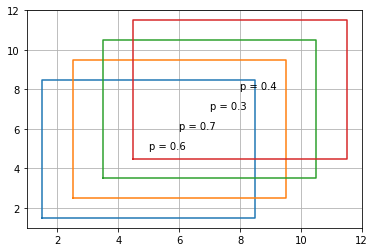

In [308]:
x_array = []
y_array = []

for box in boxes :
    x_array.append( [box[0]-box[2]/2 , box[0]+box[2]/2, box[0]+box[2]/2 , box[0]-box[2]/2, box[0]-box[2]/2])
    y_array.append( [box[1]-box[3]/2 , box[1]-box[3]/2, box[1]+box[3]/2 , box[1]+box[3]/2, box[1]-box[3]/2])
    #print(x_array)

for i,_ in enumerate(x_array) :
    plt.plot(x_array[i],y_array[i])
    plt.text( boxes[i,0] ,  boxes[i,1],"p = {}".format(probablity[i]))


plt.grid()
    

# Calculate IoU

### The method of calculation
space = minimuch (right side) * maximum (left side)

In [309]:
def batch_iou(box1,box2):
    intersection_width = np.maximum( np.minimum( box1[0]+box1[2]*0.5, box2[0]+box2[2]*0.5) - np.maximum( box1[0]-box1[2]*0.5, box2[0]-box2[2]*0.5),0 )
    intersection_height = np.maximum( np.minimum( box1[1]+box1[3]*0.5, box2[1]+box2[3]*0.5) - np.maximum( box1[1]-box1[3]*0.5, box2[1]-box2[3]*0.5),0 )                         
    inter = intersection_height*intersection_width
    union = box1[2]*box1[3] + box2[2]*box2[3] -inter
    return inter/union

In [310]:
boxes[0,:]

array([5, 5, 7, 7])

In [311]:
boxes[1,:]

array([6, 6, 7, 7])

In [312]:
batch_iou(boxes[0,:],boxes[1,:])

0.5806451612903226

# Calculate NMS

In [313]:
a = np.array([1.1,1.2]) 
a.argsort()

array([0, 1])

In [314]:
order = probablity.argsort()[::-1]
order

array([1, 0, 3, 2])

In [315]:
keep = [True] * len(order)
keep

[True, True, True, True]

In [322]:
def _nms(boxes,prob,threshhold):
    #print(probablity)
    order = probablity.argsort()[::-1]
    print("order =", order)
    keep = [True] * len(order)
    print("keep = ", keep)
    ### compare using sliding window
    ### limit
    iou = []
    for i in range(len(order)-1):
        iou.append( batch_iou(boxes[order[i+1]], boxes[order[i]]) )
        print("iou {}~{}".format(i,i+1),"=",iou[i])
        if iou[i] > threshhold:
            keep[order[i+1]] = False 
    return keep

In [323]:
nms_keep = _nms(boxes,probablity,0.5)

order = [1 0 3 2]
keep =  [True, True, True, True]
iou 0~1 = 0.5806451612903226
iou 1~2 = 0.1951219512195122
iou 2~3 = 0.5806451612903226


In [324]:
keep

[True, True, True, True]

### 1, 3 = true, 0,2 false

In [325]:
nms_keep

[False, True, False, True]

Reference    
[1]. code, https://github.com/BichenWuUCB/squeezeDet/blob/master/src/utils/util.py 